In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

## Initial Cleaning: Taking care of missing values


In [3]:
col_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]

education2 = education.copy()   

for col in col_list:
    education2.loc[:, col] = education2.loc[:, col].fillna(education2.loc[:, col].mean())
        
print((education2.isnull().sum()/education2.isnull().count())*100)

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE                0.000000
CAPITAL_OUTLAY_EXPENDITURE       0.000000
GRADES_PK_G                      0.000000
GRADES_KG_G                      0.000000
GRADES_4_G                       0.000000
GRADES_8_G                       0.000000
GRADES_12_G                      0.000000
GRADES_1_8_G                     0.000000
GRADES_9_12_G                    0.000000
GRADES_ALL_G                     0.000000
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

## Removing Outliers

### 1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

Examining boxplots for both variables, they both have a significant number of outliers

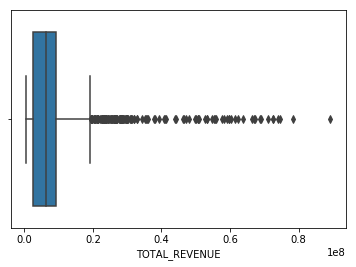

In [4]:
sns.boxplot(x = 'TOTAL_REVENUE', data = education2)

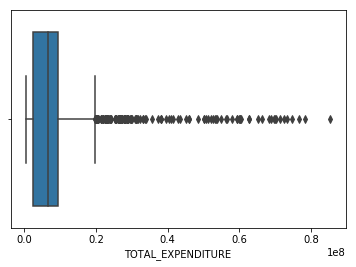

In [5]:
sns.boxplot(x = 'TOTAL_EXPENDITURE', data = education2)

### 2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

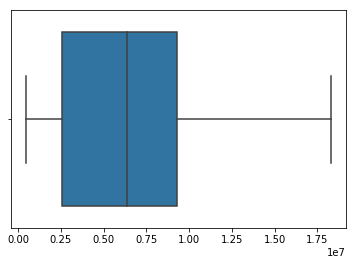

In [13]:
from scipy.stats.mstats import winsorize

winsorized_tot_rev = winsorize(education2['TOTAL_REVENUE'], (0, 0.11))

sns.boxplot(x = winsorized_tot_rev)

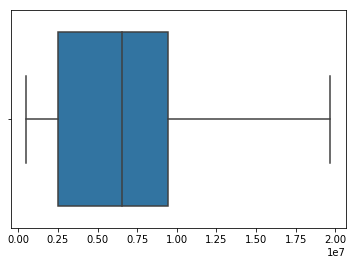

In [11]:
winsorized_tot_exp = winsorize(education2['TOTAL_EXPENDITURE'], (0, 0.10))

sns.boxplot(x = winsorized_tot_exp)

### 3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

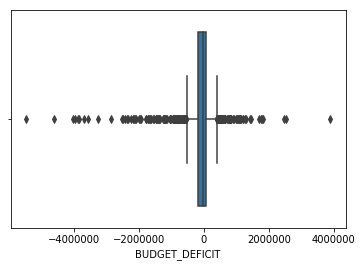

In [16]:
education['BUDGET_DEFICIT'] = education['TOTAL_REVENUE'] - education['TOTAL_EXPENDITURE']

sns.boxplot(x = 'BUDGET_DEFICIT', data = education)

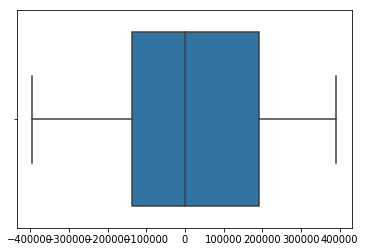

In [20]:
winsorized_deficit = winsorize(education['BUDGET_DEFICIT'], (0.10, 0.20))

sns.boxplot(x = winsorized_deficit)

### 4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

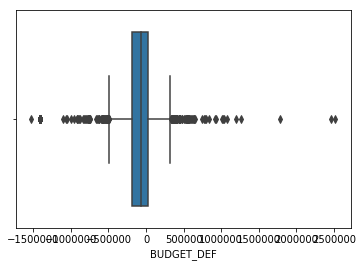

In [22]:
education2['BUDGET_DEF'] = winsorized_tot_rev - winsorized_tot_exp

sns.boxplot(x = 'BUDGET_DEF', data = education2)

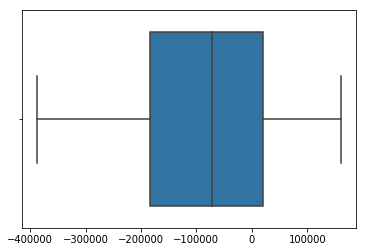

In [28]:
winsorized_def = winsorize(education2['BUDGET_DEF'], (0.15, 0.10))

sns.boxplot(x = winsorized_def)

### 5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [40]:
print("Pre-outlier eliminated budget deficit mean ", winsorized_deficit.mean())
print("Outlier eliminated budget deficit mean ", winsorized_def.mean())
print("\n")
print("Pre-outlier eliminated budget deficit variance ", winsorized_deficit.var())
print("Outlier eliminated budget deficit variance ", winsorized_def.var())
print("\n")
print("Pre-outlier eliminated budget deficit standard deviation ", winsorized_deficit.std())
print("Outlier eliminated budget deficit standard deviation ", winsorized_def.std())

Pre-outlier eliminated budget deficit mean  18146.5408847185
Outlier eliminated budget deficit mean  -90181.81779700062


Pre-outlier eliminated budget deficit variance  62096549205.89042
Outlier eliminated budget deficit variance  28910589634.684776


Pre-outlier eliminated budget deficit standard deviation  249191.7920114754
Outlier eliminated budget deficit standard deviation  170031.14313173565


We see big differences across the descriptive statistics, and even just looking at the boxplots we can see there is a big difference. Especially when we look at the range and variance measures for both. 

 ### 6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

I think the method in the third question would be more appropriate because we are performing an operation on the data before we have altered it in any way. This gives us a more accurate representation of the data, in this case the budget deficit. Then it makes sense to address the outliers after this has been done. If we alter the data first and then perform an operation on the altered data I feel this will only lead to bigger problems.  